In [1]:
# Python3 program to change the 
# directory of file using os.chdir() method 

# import os library 
import os 

# change the current directory 
# to specified directory 
os.chdir(r"C:\Users\anchhabra\HR_Practice_case")

print("Directory changed")

Directory changed


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pylab
sns.set(style="ticks", color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# import researchpy as rp
from scipy import stats
import pandas.core.algorithms as algos
from pandas import Series
import re
import traceback
import string

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [4]:
raw_train_data = pd.read_csv('train_LZdllcl.csv')
raw_test_data = pd.read_csv('test_2umaH9m.csv')
raw_train_data.head()
raw_test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61


# Exploratory Data Analysis

In [5]:
raw_train_data.info()
raw_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null

## Event Rate in Train and Test Data

In [6]:
event_cnt_pct = raw_train_data[['is_promoted','employee_id']].groupby('is_promoted').agg({'employee_id':'count'})
event_cnt_pct['percentage'] = 100*event_cnt_pct['employee_id'] /event_cnt_pct['employee_id'].sum()
event_cnt_pct

,employee_id,percentage
is_promoted,,
0,50140,91.482995
1,4668,8.517005


In [7]:
# raw_train_data['is_promoted'].value_counts()

In [8]:
raw_train_data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [9]:
dept_cnt = raw_train_data[['employee_id','department']].groupby('department').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
dept_cnt['Percentage'] = 100 * dept_cnt['employee_id']  / dept_cnt['employee_id'].sum()
dept_cnt

,employee_id,Percentage
department,,
Sales & Marketing,16840,30.725442
Operations,11348,20.705007
Procurement,7138,13.023646
Technology,7138,13.023646
Analytics,5352,9.764998
Finance,2536,4.627062
HR,2418,4.411765
Legal,1039,1.895709
R&D,999,1.822727


(<seaborn.axisgrid.FacetGrid at 0x289732bf438>,
 Text(0.5, 0.98, 'Department/Vertical Distribution'))

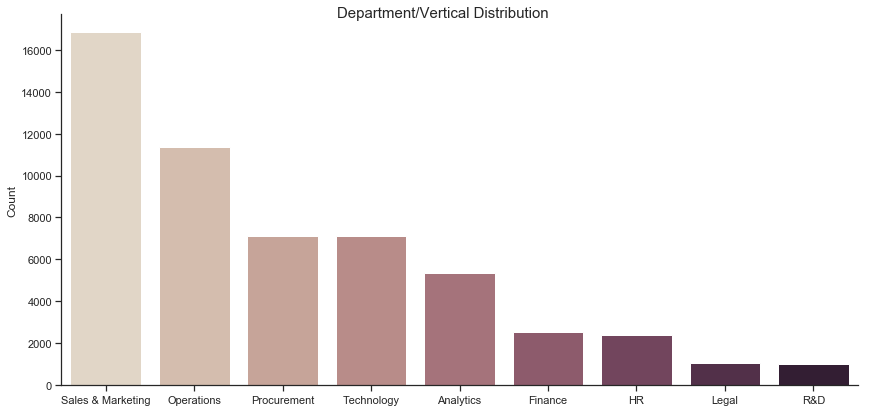

In [10]:
dept_cnt_ordr = raw_train_data.groupby("department")['employee_id'].sum().sort_values(ascending=False).index.values
ax = sns.catplot(x = "department",kind='count',palette='ch:.25',data=raw_train_data,size=6, aspect=2,order=dept_cnt_ordr)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Department/Vertical Distribution',fontsize=15))

Highest number of individuals are in Sales and Marketing verticals followed by Operations

#### Bi-variate Analysis between is_promoted and Department

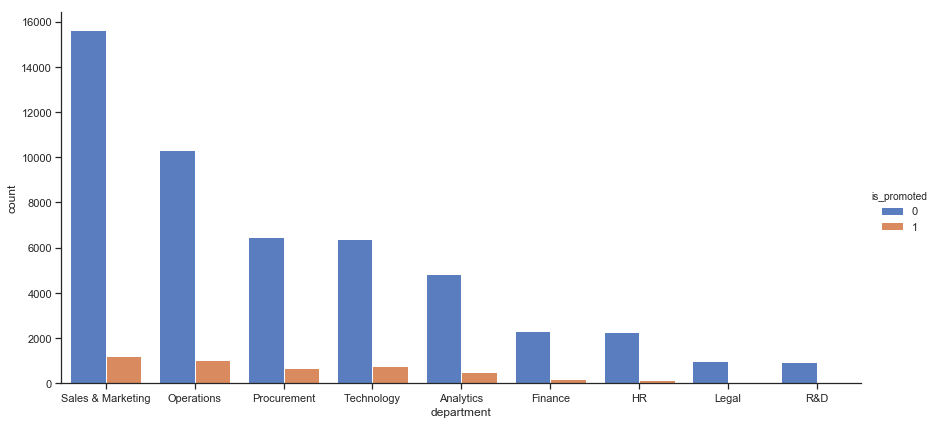

In [11]:
ax = sns.catplot(x = "department",kind='count',hue="is_promoted",palette="muted",data=raw_train_data,size=6, aspect=2,order=dept_cnt_ordr)

In [12]:
print("Train Data")
print(raw_train_data.region.unique())
print(raw_train_data.region.nunique())

print("Test Data")
print(raw_train_data.region.unique())
print(raw_train_data.region.nunique())

Train Data
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
34
Test Data
['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']
34


Data Distribution


,employee_id,Percentage
region,,
region_2,12343,22.520435
region_22,6428,11.728215
region_7,4843,8.836301
region_15,2808,5.123340
region_13,2648,4.831411
region_26,2260,4.123486
region_31,1935,3.530506
region_4,1703,3.107211
region_27,1659,3.026930


(<seaborn.axisgrid.FacetGrid at 0x289751efc18>,
 Text(0.5, 0.98, 'Region Distribution'))

(<seaborn.axisgrid.FacetGrid at 0x289751e1358>,
 Text(0.5, 0.98, 'Region Distribution'))

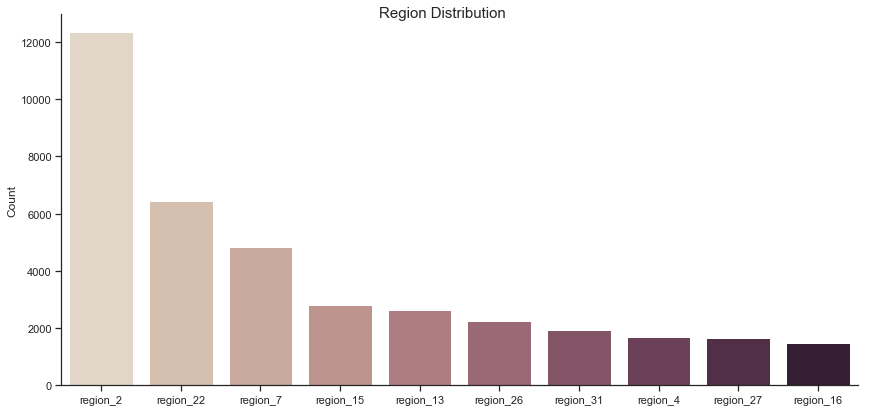

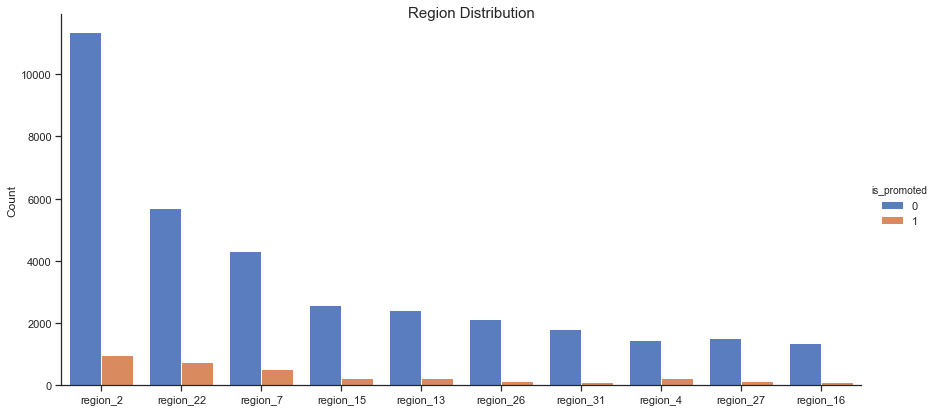

In [13]:
print("Data Distribution")
rgn_cnt = raw_train_data[['employee_id','region']].groupby('region').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
rgn_cnt['Percentage'] = 100 * rgn_cnt['employee_id'] / rgn_cnt['employee_id'].sum()
rgn_cnt.head(10)

rgn_cnt_ordr = raw_train_data.groupby('region')['employee_id'].sum().sort_values(ascending=False).index.values
ax = sns.catplot(x = 'region',kind='count',palette='ch:.25',data=raw_train_data,size=6, aspect=2
            ,order=raw_train_data.region.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Region Distribution',fontsize=15))

ax = sns.catplot(x = 'region',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=2
            ,order=raw_train_data.region.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Region Distribution',fontsize=15))

Most no. of employees from region 2 followed by 22 and others

,employee_id,Percentage
education,,
Bachelor's,36669,69.980343
Master's & above,14925,28.483368
Below Secondary,805,1.536289


(<seaborn.axisgrid.FacetGrid at 0x28973340d30>,
 Text(0.5, 0.98, 'Education Distribution'))

(<seaborn.axisgrid.FacetGrid at 0x289762a9710>,
 Text(0.5, 0.98, 'Education Distribution'))

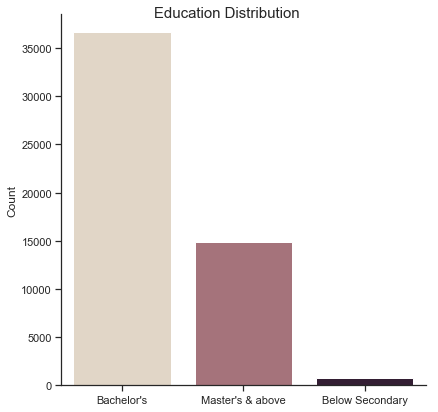

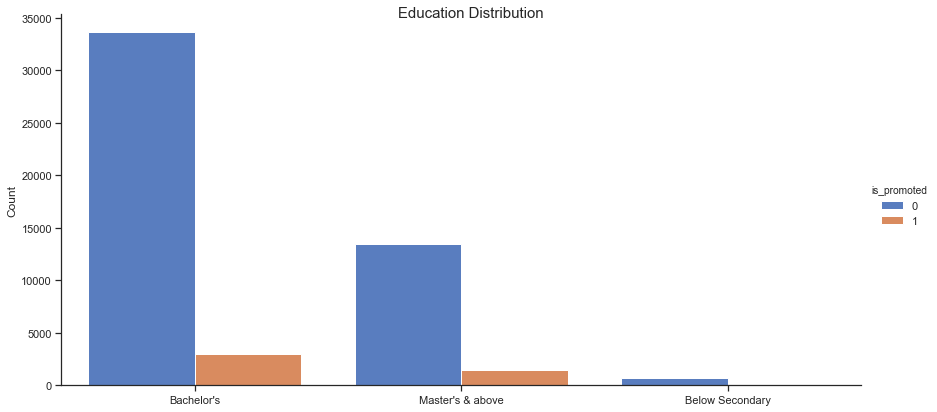

In [14]:
education_cnt = raw_train_data[['education','employee_id']].groupby('education').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
education_cnt['Percentage'] = 100 * education_cnt['employee_id'] / education_cnt['employee_id'].sum()
education_cnt

ax = sns.catplot(x='education',kind='count',palette='ch:.25',data=raw_train_data,size=6, aspect=1,
            order=raw_train_data.education.value_counts().index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Education Distribution',fontsize=15))

ax = sns.catplot(x = 'education',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=2
            ,order=raw_train_data.education.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Education Distribution',fontsize=15))

In [15]:
gender_cnt = raw_train_data[['gender','employee_id']].groupby('gender').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
gender_cnt['Percentage'] = 100* gender_cnt['employee_id'] / gender_cnt['employee_id'].sum()
gender_cnt

,employee_id,Percentage
gender,,
m,38496,70.237921
f,16312,29.762079


(<seaborn.axisgrid.FacetGrid at 0x289752079e8>,
 Text(0.5, 0.98, 'Gender Distribution'))

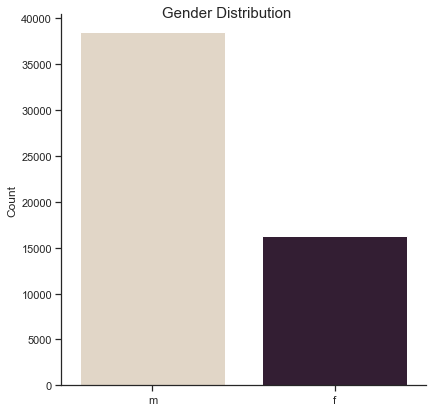

In [16]:
ax = sns.catplot(x='gender',kind = 'count',palette='ch:.25',data=raw_train_data,size=6, aspect=1,
                order = raw_train_data.gender.value_counts().index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Gender Distribution',fontsize=15))

70% of the population is Male

(<seaborn.axisgrid.FacetGrid at 0x2897501a4a8>,
 Text(0.5, 0.98, 'Gender Distribution'))

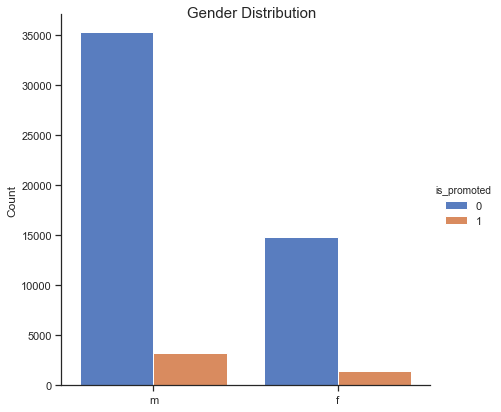

In [17]:
ax = sns.catplot(x = 'gender',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=1
            ,order=raw_train_data.gender.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Gender Distribution',fontsize=15))

In [18]:
rcrt_cnt = raw_train_data[['employee_id',
                           'recruitment_channel']].groupby('recruitment_channel').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
rcrt_cnt['Percentage'] = 100* rcrt_cnt['employee_id']/rcrt_cnt['employee_id'].sum()
rcrt_cnt

,employee_id,Percentage
recruitment_channel,,
other,30446,55.550285
sourcing,23220,42.366078
referred,1142,2.083637


(<seaborn.axisgrid.FacetGrid at 0x28975643470>,
 Text(0.5, 0.98, 'Recruitment Channel Distribution'))

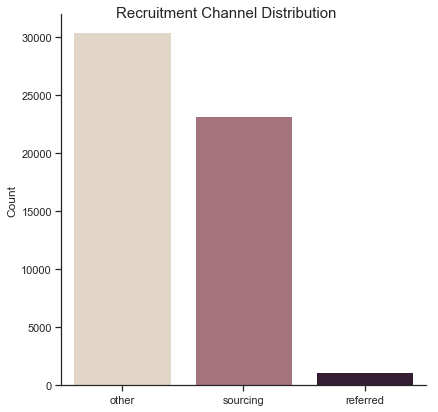

In [19]:
ax =  sns.catplot(x = 'recruitment_channel',kind = 'count',palette='ch:.25',data=raw_train_data,size=6, aspect=1,
                 order = raw_train_data.recruitment_channel.value_counts().index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Recruitment Channel Distribution',fontsize=15))

(<seaborn.axisgrid.FacetGrid at 0x28975643c88>,
 Text(0.5, 0.98, 'recruitment_channel Distribution'))

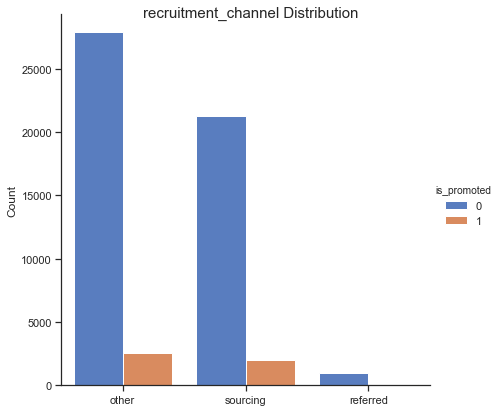

In [20]:
ax = sns.catplot(x = 'recruitment_channel',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=1
            ,order=raw_train_data.recruitment_channel.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('recruitment_channel Distribution',fontsize=15))

In [21]:
n_trainings = raw_train_data[['employee_id',
                           'no_of_trainings']].groupby('no_of_trainings').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
n_trainings['Percentage'] = 100* n_trainings['employee_id']/n_trainings['employee_id'].sum()
n_trainings

,employee_id,Percentage
no_of_trainings,,
1,44378,80.969931
2,7987,14.572690
3,1776,3.240403
4,468,0.853890
5,128,0.233543
6,44,0.080280
7,12,0.021895
8,5,0.009123
9,5,0.009123


(<seaborn.axisgrid.FacetGrid at 0x289751c8198>,
 Text(0.5, 0.98, 'Number of Trainings'))

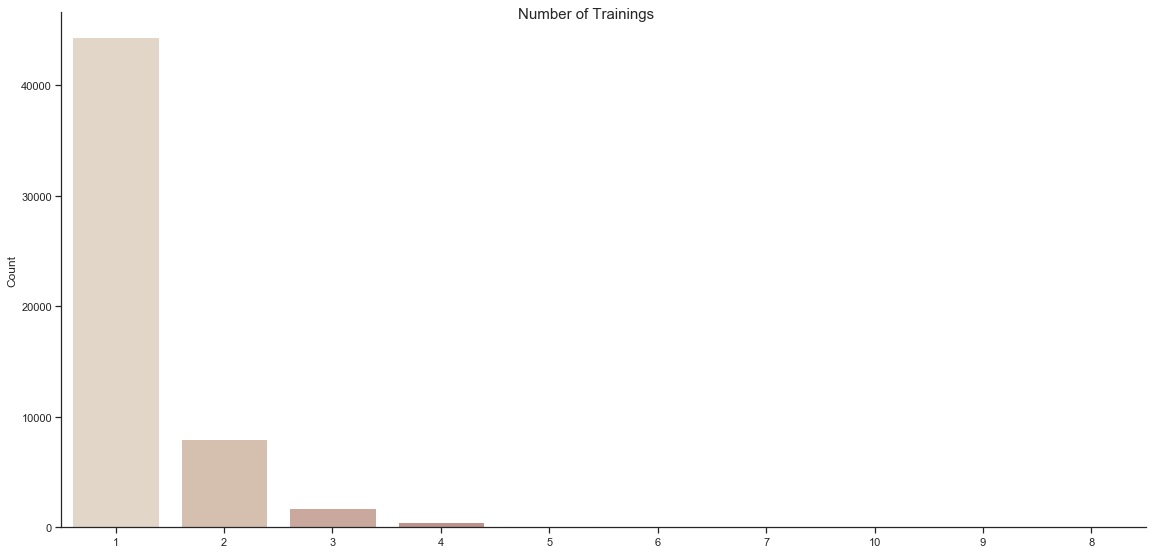

In [22]:
ax =  sns.catplot(x = 'no_of_trainings',kind = 'count',palette='ch:.25',data=raw_train_data,size=8, aspect=2,
                 order = raw_train_data.no_of_trainings.value_counts().index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Number of Trainings',fontsize=15))

(<seaborn.axisgrid.FacetGrid at 0x289751fcc50>,
 Text(0.5, 0.98, 'no_of_trainings Distribution'))

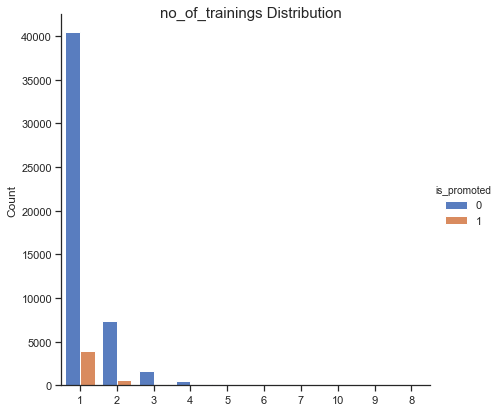

In [23]:
ax = sns.catplot(x = 'no_of_trainings',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=1
            ,order=raw_train_data.no_of_trainings.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('no_of_trainings Distribution',fontsize=15))

In [24]:
pre_yr_rtng = raw_train_data[['employee_id',
                           'previous_year_rating']].groupby('previous_year_rating').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
pre_yr_rtng['Percentage'] = 100* pre_yr_rtng['employee_id']/pre_yr_rtng['employee_id'].sum()
pre_yr_rtng

,employee_id,Percentage
previous_year_rating,,
3.0,18618,36.733486
5.0,11741,23.165101
4.0,9877,19.487412
1.0,6223,12.278036
2.0,4225,8.335964


(<seaborn.axisgrid.FacetGrid at 0x289751e5a20>,
 Text(0.5, 0.98, 'Previous Year Rating'))

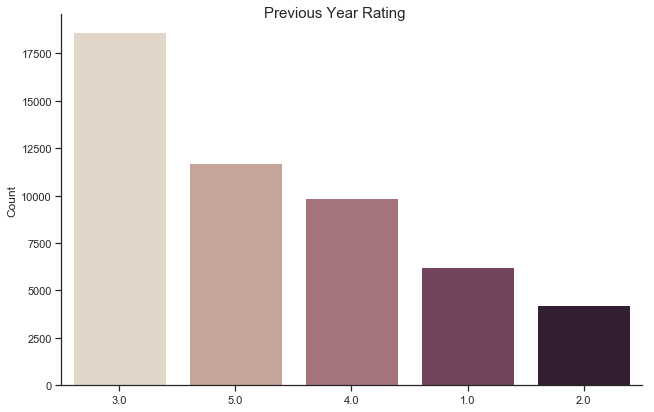

In [25]:
ax =  sns.catplot(x = 'previous_year_rating',kind = 'count',palette='ch:.25',data=raw_train_data,size=6, aspect=1.5,
                 order = raw_train_data.previous_year_rating.value_counts().index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Previous Year Rating',fontsize=15))

(<seaborn.axisgrid.FacetGrid at 0x289754d6128>,
 Text(0.5, 0.98, 'previous_year_rating Distribution'))

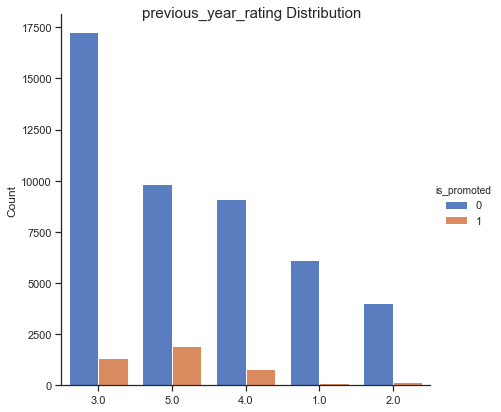

In [26]:
ax = sns.catplot(x = 'previous_year_rating',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=1
            ,order=raw_train_data.previous_year_rating.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('previous_year_rating Distribution',fontsize=15))

In [27]:
# del raw_train_data['KPIs_met_gt_80%']
# del raw_test_data['KPIs_met_gt_80%']

In [28]:
raw_train_data.rename(columns= {"KPIs_met >80%": "KPIs_met_gt_80"},inplace = True)
raw_test_data.rename(columns= {"KPIs_met >80%": "KPIs_met_gt_80"},inplace = True)
raw_train_data.columns
raw_test_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_gt_80', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_gt_80', 'awards_won?',
       'avg_training_score'],
      dtype='object')

In [29]:
kpi_met = raw_train_data[['KPIs_met_gt_80','employee_id']].groupby('KPIs_met_gt_80').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
kpi_met['Percentage'] = 100* kpi_met['employee_id']/kpi_met['employee_id'].sum()
kpi_met

,employee_id,Percentage
KPIs_met_gt_80,,
0,35517,64.802584
1,19291,35.197416


(<seaborn.axisgrid.FacetGrid at 0x2897307d4e0>, Text(0.5, 0.98, 'KPIs Met'))

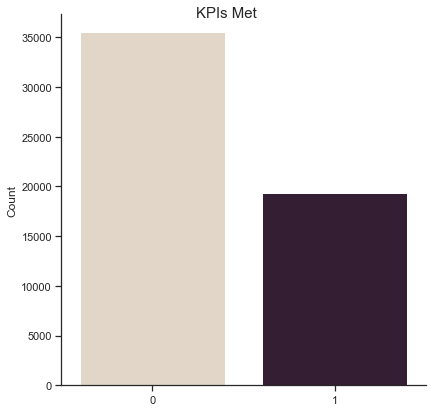

In [30]:
ax =  sns.catplot(x = 'KPIs_met_gt_80',kind = 'count',palette='ch:.25',data=raw_train_data,size=6, aspect=1)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('KPIs Met',fontsize=15))

(<seaborn.axisgrid.FacetGrid at 0x28975b59208>,
 Text(0.5, 0.98, '80% KPIs met Distribution'))

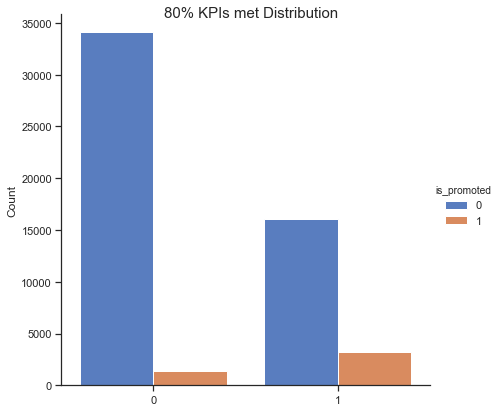

In [31]:
ax = sns.catplot(x = 'KPIs_met_gt_80',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=1
            ,order=raw_train_data.KPIs_met_gt_80.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('80% KPIs met Distribution',fontsize=15))

## Missing Value Treatment

### Training Data

In [32]:
mis_val = raw_train_data.isnull().sum()
mis_val_percent = 100 * raw_train_data.isnull().sum() / len(raw_train_data)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
# mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values
employee_id,0,0.000000
department,0,0.000000
region,0,0.000000
education,2409,4.395344
gender,0,0.000000
recruitment_channel,0,0.000000
no_of_trainings,0,0.000000
age,0,0.000000
previous_year_rating,4124,7.524449
length_of_service,0,0.000000


### Test Data

In [33]:
mis_val_test_data = raw_test_data.isnull().sum()
mis_val_test_data_pct = 100 * raw_test_data.isnull().sum()/len(raw_test_data)
mis_val_table = pd.concat([mis_val_test_data, mis_val_test_data_pct], axis=1)
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1: '% of Total Values'})
mis_val_table_ren_columns

,Missing Values,% of Total Values
employee_id,0,0.000000
department,0,0.000000
region,0,0.000000
education,1034,4.401873
gender,0,0.000000
recruitment_channel,0,0.000000
no_of_trainings,0,0.000000
age,0,0.000000
previous_year_rating,1812,7.713921
length_of_service,0,0.000000


Treating the missing values in Train and Test data together

#### Education Variable Missing Value Treatment

In [34]:
ct = pd.crosstab(raw_train_data['is_promoted'], raw_train_data['education'].fillna('missing'))
ct_pct = ct.apply(lambda r: r/r.sum(), axis=0)
ct_pct

education,Bachelor's,Below Secondary,Master's & above,missing
is_promoted,,,,
0,0.917969,0.91677,0.901441,0.949357
1,0.082031,0.08323,0.098559,0.050643


In [35]:
ct = pd.crosstab(raw_train_data['is_promoted'], raw_train_data['previous_year_rating'].fillna('missing'))
ct_pct = ct.apply(lambda r: r/r.sum(), axis=0)
ct_pct

previous_year_rating,1.0,2.0,3.0,4.0,5.0,missing
is_promoted,,,,,,
0,0.985859,0.95716,0.927221,0.920624,0.836385,0.917798
1,0.014141,0.04284,0.072779,0.079376,0.163615,0.082202


Replacing missing values by the most frequent category

In [36]:
# Train Data
raw_train_data['education'].fillna("Bachelor's",inplace = True)
raw_train_data['previous_year_rating'].fillna(3.0,inplace = True)

# Test Data
raw_test_data['education'].fillna("Bachelor's",inplace = True)
raw_test_data['previous_year_rating'].fillna(3.0,inplace = True)

In [37]:
ct = pd.crosstab(raw_train_data['is_promoted'], raw_train_data['previous_year_rating'].fillna('missing'))
ct_pct = ct.apply(lambda r: r/r.sum(), axis=0)
ct_pct

previous_year_rating,1.0,2.0,3.0,4.0,5.0
is_promoted,,,,,
0,0.985859,0.95716,0.925512,0.920624,0.836385
1,0.014141,0.04284,0.074488,0.079376,0.163615


In [38]:
ct = pd.crosstab(raw_train_data['is_promoted'], raw_train_data['education'].fillna('missing'))
ct_pct = ct.apply(lambda r: r/r.sum(), axis=0)
ct_pct

education,Bachelor's,Below Secondary,Master's & above
is_promoted,,,
0,0.919904,0.91677,0.901441
1,0.080096,0.08323,0.098559


In [39]:
mis_val = raw_train_data.isnull().sum()
mis_val_percent = 100 * raw_train_data.isnull().sum() / len(raw_train_data)
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
# Rename the columns
mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)
mis_val_table_ren_columns

,Missing Values,% of Total Values


No missing values in the data now

## Relationship between Promotion and Independent Variables - Chi-square test of Independence

In [40]:
from scipy.stats import chi2_contingency

### Department's Significance with Promotion

In [41]:
crosstab = pd.crosstab(raw_train_data['is_promoted'], raw_train_data['department'])
crosstab

department,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
is_promoted,,,,,,,,,
0,4840,2330,2282,986,10325,6450,930,15627,6370
1,512,206,136,53,1023,688,69,1213,768


In [42]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected Values: ", expected)

Chi-square value:  151.42635516323872
p-value:  9.882497107474489e-29
Degrees of freedom:  8
Expected Values:  [[ 4896.1699022   2320.00875785  2212.05882353   950.50831995
  10381.49029339  6530.05619618   913.91512188 15405.73638885
   6530.05619618]
 [  455.8300978    215.99124215   205.94117647    88.49168005
    966.50970661   607.94380382    85.08487812  1434.26361115
    607.94380382]]


Since p-value is almost 0, we reject the null hypothesis which means there is a statistically significant relationshiop between department and promotions. But we still do not know the depth of the relationship, post-hoc tests need to be conducted in order to see where the difference between the departments and promotions since the deptartment has many groups/categories

Now that we know our Chi-square test of independence is significant, we want to test where the relationship is between the levels of the variables. In order to do this, we need to conduct multiple 2×2 Chi-square tests using the Bonferroni-adjusted p-value
http://www.biostathandbook.com/multiplecomparisons.html#bonferroni

In [43]:
dept_dummies = pd.get_dummies(raw_train_data['department'])
dept_dummies.head()

,Analytics,Finance,HR,Legal,Operations,Procurement,R&D,Sales & Marketing,Technology
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1


In [44]:
# empty list
p_value = []
all_p_values = []
for i in dept_dummies:
    nl = "\n"
    crosstab = pd.crosstab(dept_dummies[f"{i}"],raw_train_data['is_promoted'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    p_value = [p]
    all_p_values.append(p_value)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

is_promoted      0     1
Analytics               
0            45300  4156
1             4840   512 

Chi2 value= 8.236117063674477
p-value= 0.004106489035847602
Degrees of freedom= 1

is_promoted      0     1
Finance                 
0            47810  4462
1             2330   206 

Chi2 value= 0.47801819536394463
p-value= 0.4893213666222338
Degrees of freedom= 1

is_promoted      0     1
HR                      
0            47858  4532
1             2282   136 

Chi2 value= 26.776026652365665
p-value= 2.284539570263827e-07
Degrees of freedom= 1

is_promoted      0     1
Legal                   
0            49154  4615
1              986    53 

Chi2 value= 15.416960822560394
p-value= 8.621102810922093e-05
Degrees of freedom= 1

is_promoted      0     1
Operations              
0            39815  3645
1            10325  1023 

Chi2 value= 4.47129293896784
p-value= 0.03446889922561121
Degrees of freedom= 1

is_promoted      0     1
Procurement             
0            43690  398

Based on the Chi-square test results above - we can combine a few of the variables categories into each other and reduce the number of overall categories - this is very similar to weight of Evidence technique

In [45]:
print(all_p_values)
flat_list = []
for sublist in all_p_values:
    for item in sublist:
        flat_list.append(item)
print(flat_list)

[[0.004106489035847602], [0.4893213666222338], [2.284539570263827e-07], [8.621102810922093e-05], [0.03446889922561121], [0.0002978169290859234], [0.07461958540843588], [2.4349892877335133e-13], [4.0296500808833257e-13]]
[0.004106489035847602, 0.4893213666222338, 2.284539570263827e-07, 8.621102810922093e-05, 0.03446889922561121, 0.0002978169290859234, 0.07461958540843588, 2.4349892877335133e-13, 4.0296500808833257e-13]


### Merge the levels of department varaible based on Post-hoc testing

In [46]:
print(raw_train_data.department.unique())
print(raw_train_data.department.nunique())
print(raw_test_data.department.unique())
print(raw_test_data.department.nunique())

['Sales & Marketing' 'Operations' 'Technology' 'Analytics' 'R&D'
 'Procurement' 'Finance' 'HR' 'Legal']
9
['Technology' 'HR' 'Sales & Marketing' 'Procurement' 'Finance' 'Analytics'
 'Operations' 'Legal' 'R&D']
9


In [47]:
dept_list = {"Analytics":'Analytics',
"HR":'HR',
"Legal":'Legal',
"Procurement":'Procurement',
"Sales & Marketing":'Sales & Marketing',
"Technology":'Technology',
"Finance" :'Others',
"Operations":'Others',
"R&D":'Others'
}
dept_list

{'Analytics': 'Analytics',
 'HR': 'HR',
 'Legal': 'Legal',
 'Procurement': 'Procurement',
 'Sales & Marketing': 'Sales & Marketing',
 'Technology': 'Technology',
 'Finance': 'Others',
 'Operations': 'Others',
 'R&D': 'Others'}

In [48]:
raw_train_data['new_dept'] = raw_train_data.department.map(dept_list).astype("category", categories=set(dept_list.values()))
raw_test_data['new_dept'] = raw_test_data.department.map(dept_list).astype("category", categories = set(dept_list.values()))
raw_train_data.head(3)
raw_test_data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,is_promoted,new_dept
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Sales & Marketing
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Others
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Sales & Marketing


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,new_dept
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,Technology
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,HR
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Sales & Marketing


In [49]:
raw_train_data.new_dept.unique()
raw_test_data.new_dept.unique()

[Sales & Marketing, Others, Technology, Analytics, Procurement, HR, Legal]
Categories (7, object): [Sales & Marketing, Others, Technology, Analytics, Procurement, HR, Legal]

[Technology, HR, Sales & Marketing, Procurement, Others, Analytics, Legal]
Categories (7, object): [Technology, HR, Sales & Marketing, Procurement, Others, Analytics, Legal]

(<seaborn.axisgrid.FacetGrid at 0x28975dbc358>,
 Text(0.5, 0.98, 'Department Distribution'))

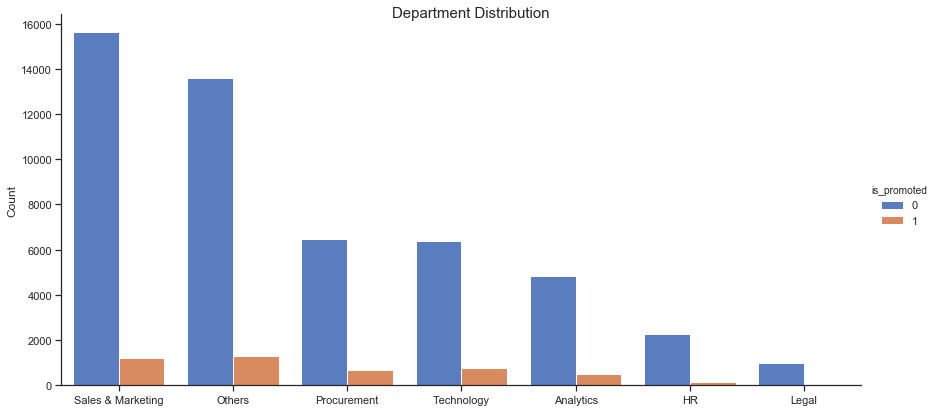

In [50]:
ax = sns.catplot(x = 'new_dept',kind='count', hue = 'is_promoted', palette='muted',data=raw_train_data,size=6, aspect=2
            ,order=raw_train_data.new_dept.value_counts().iloc[:10].index)
(ax.set_axis_labels("", "Count"),ax.fig.suptitle('Department Distribution',fontsize=15))

### Region Significance with Promotion

In [51]:
raw_train_data.region.unique()
raw_train_data.region.nunique()
raw_test_data.region.unique()
raw_test_data.region.nunique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

34

array(['region_26', 'region_4', 'region_13', 'region_2', 'region_29',
       'region_7', 'region_22', 'region_16', 'region_17', 'region_24',
       'region_11', 'region_27', 'region_9', 'region_20', 'region_34',
       'region_23', 'region_8', 'region_14', 'region_31', 'region_19',
       'region_5', 'region_28', 'region_15', 'region_3', 'region_25',
       'region_12', 'region_21', 'region_30', 'region_10', 'region_33',
       'region_32', 'region_6', 'region_1', 'region_18'], dtype=object)

34

In [52]:
crosstab = pd.crosstab(raw_train_data['region'],raw_train_data['is_promoted'])
crosstab.head()

is_promoted,0,1
region,,
region_1,552,58
region_10,597,51
region_11,1241,74
region_12,467,33
region_13,2418,230


In [53]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
# print("Expected Values: ", expected)

Chi-square value:  475.6402377579206
p-value:  7.275378205784026e-80
Degrees of freedom:  33


In [54]:
rgn_dummies = pd.get_dummies(raw_train_data['region'])
rgn_dummies.head()

,region_1,region_10,region_11,region_12,region_13,region_14,region_15,region_16,region_17,region_18,...,region_31,region_32,region_33,region_34,region_4,region_5,region_6,region_7,region_8,region_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
for i in rgn_dummies:
    nl = "\n"
    crosstab = pd.crosstab(rgn_dummies[f"{i}"],raw_train_data['is_promoted'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

is_promoted      0     1
region_1                
0            49588  4610
1              552    58 

Chi2 value= 0.6544940507214174
p-value= 0.41851050674567236
Degrees of freedom= 1

is_promoted      0     1
region_10               
0            49543  4617
1              597    51 

Chi2 value= 0.2729359643511468
p-value= 0.6013690677528354
Degrees of freedom= 1

is_promoted      0     1
region_11               
0            48899  4594
1             1241    74 

Chi2 value= 14.061265079792339
p-value= 0.0001769507228160931
Degrees of freedom= 1

is_promoted      0     1
region_12               
0            49673  4635
1              467    33 

Chi2 value= 2.1381345866672383
p-value= 0.1436765059266282
Degrees of freedom= 1

is_promoted      0     1
region_13               
0            47722  4438
1             2418   230 

Chi2 value= 0.08025631626912832
p-value= 0.7769503590728565
Degrees of freedom= 1

is_promoted      0     1
region_14               
0            49375  4606


In [56]:
rgn_list = {"region_1":  "Others" ,
"region_10":  "Others" ,
"region_11":  "region_11",
"region_12":  "Others" ,
"region_13":  "Others" ,
"region_14":  "Others" ,
"region_15":  "Others" ,
"region_16":  "Others" ,
"region_17":  "region_17",
"region_18":  "Others" ,
"region_19":  "Others" ,
"region_2":   "Others" ,
"region_20":  "Others" ,
"region_21":  "Others" ,
"region_22":  "region_22",
"region_23":  "region_23",
"region_24":  "region_24",
"region_25":  "region_25",
"region_26":  "region_26",
"region_27":  "Others" ,
"region_28":  "region_28",
"region_29":  "region_29",
"region_3":   "Others" ,
"region_30":  "Others" ,
"region_31":  "region_31",
"region_32":  "region_32",
"region_33":  "Others" ,
"region_34":  "region_34",
"region_4":   "region_4",
"region_5":   "region_5",
"region_6":   "region_6",
"region_7":   "region_7",
"region_8":   "Others" ,
"region_9":   "region_9"    
}
rgn_list

{'region_1': 'Others',
 'region_10': 'Others',
 'region_11': 'region_11',
 'region_12': 'Others',
 'region_13': 'Others',
 'region_14': 'Others',
 'region_15': 'Others',
 'region_16': 'Others',
 'region_17': 'region_17',
 'region_18': 'Others',
 'region_19': 'Others',
 'region_2': 'Others',
 'region_20': 'Others',
 'region_21': 'Others',
 'region_22': 'region_22',
 'region_23': 'region_23',
 'region_24': 'region_24',
 'region_25': 'region_25',
 'region_26': 'region_26',
 'region_27': 'Others',
 'region_28': 'region_28',
 'region_29': 'region_29',
 'region_3': 'Others',
 'region_30': 'Others',
 'region_31': 'region_31',
 'region_32': 'region_32',
 'region_33': 'Others',
 'region_34': 'region_34',
 'region_4': 'region_4',
 'region_5': 'region_5',
 'region_6': 'region_6',
 'region_7': 'region_7',
 'region_8': 'Others',
 'region_9': 'region_9'}

In [57]:
raw_train_data['new_rgn'] = raw_train_data.region.map(rgn_list).astype("category", categories=set(rgn_list.values()))
raw_test_data['new_rgn'] = raw_test_data.region.map(rgn_list).astype("category", categories=set(rgn_list.values()))
raw_train_data.head(3)
raw_test_data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,is_promoted,new_dept,new_rgn
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Sales & Marketing,region_7
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Others,region_22
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Sales & Marketing,Others


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,new_dept,new_rgn
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,Technology,region_26
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,HR,region_4
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Sales & Marketing,Others


In [58]:
raw_train_data.new_rgn.unique()
raw_test_data.new_rgn.unique()

[region_7, region_22, Others, region_23, region_26, ..., region_25, region_32, region_6, region_24, region_9]
Length: 18
Categories (18, object): [region_7, region_22, Others, region_23, ..., region_32, region_6, region_24, region_9]

[region_26, region_4, Others, region_29, region_7, ..., region_5, region_28, region_25, region_32, region_6]
Length: 18
Categories (18, object): [region_26, region_4, Others, region_29, ..., region_28, region_25, region_32, region_6]

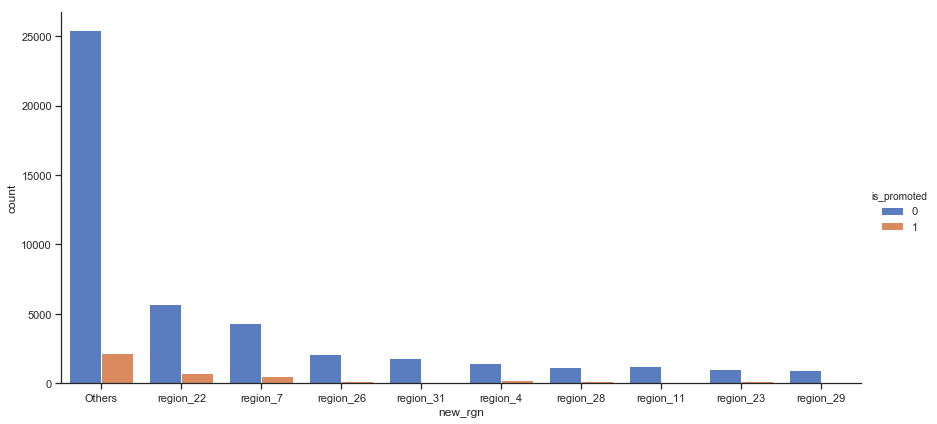

In [59]:
ax = sns.catplot(x = 'new_rgn',kind = 'count', hue = 'is_promoted', palette = 'muted', data =  raw_train_data, size = 6,
                aspect = 2,order= raw_train_data.new_rgn.value_counts().iloc[:10].index)

In [60]:
print(raw_train_data.education.unique())
print(raw_train_data.education.nunique())

print(raw_test_data.education.unique())
print(raw_test_data.education.nunique())

["Master's & above" "Bachelor's" 'Below Secondary']
3
["Bachelor's" "Master's & above" 'Below Secondary']
3


In [61]:
crosstab = pd.crosstab(raw_train_data['education'],raw_train_data['is_promoted'])
crosstab

is_promoted,0,1
education,,
Bachelor's,35948,3130
Below Secondary,738,67
Master's & above,13454,1471


In [62]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
# print("Expected Values: ", expected)

Chi-square value:  47.29119458884267
p-value:  5.3808089671607115e-11
Degrees of freedom:  2


In [63]:
ed_dummies = pd.get_dummies(raw_train_data['education'])
ed_dummies.head()

,Bachelor's,Below Secondary,Master's & above
0,0,0,1
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [64]:
for i in ed_dummies:
    nl = "\n"
    crosstab = pd.crosstab(ed_dummies[f"{i}"],raw_train_data['is_promoted'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

is_promoted      0     1
Bachelor's              
0            14192  1538
1            35948  3130 

Chi2 value= 44.760924376680016
p-value= 2.22621402573485e-11
Degrees of freedom= 1

is_promoted          0     1
Below Secondary             
0                49402  4601
1                  738    67 

Chi2 value= 0.018245718905831584
p-value= 0.8925512202570883
Degrees of freedom= 1

is_promoted           0     1
Master's & above             
0                 36686  3197
1                 13454  1471 

Chi2 value= 46.955935726239616
p-value= 7.260077544258428e-12
Degrees of freedom= 1



In [65]:
print(raw_train_data.recruitment_channel.nunique())
print(raw_train_data.recruitment_channel.unique())

3
['sourcing' 'other' 'referred']


In [66]:
crosstab = pd.crosstab(raw_train_data['recruitment_channel'],raw_train_data['is_promoted'])
crosstab

is_promoted,0,1
recruitment_channel,,
other,27890,2556
referred,1004,138
sourcing,21246,1974


In [67]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
# print("Expected Values: ", expected)

Chi-square value:  19.23633518768639
p-value:  6.650937825577018e-05
Degrees of freedom:  2


In [68]:
print(raw_train_data.no_of_trainings.nunique())
print(raw_train_data.no_of_trainings.unique())

10
[ 1  2  3  4  7  5  6  8 10  9]


In [69]:
crosstab = pd.crosstab(raw_train_data['no_of_trainings'],raw_train_data['is_promoted'])
crosstab

is_promoted,0,1
no_of_trainings,,
1,40468,3910
2,7382,605
3,1654,122
4,442,26
5,125,3
6,42,2
7,12,0
8,5,0
9,5,0


In [70]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
# print("Expected Values: ", expected)

Chi-square value:  35.132401310728966
p-value:  5.6462682173663955e-05
Degrees of freedom:  9


In [71]:
training_list = {1:'1 Training',
2:'2 Trainings',
3:'3 Trainings',
4:'4 Trainings',
5:'5 Trainings',
6:'>=6 Trainings',
7 :'>=6 Trainings',
8:'>=6 Trainings',
9:'>=6 Trainings',
10:'>=6 Trainings'
}
training_list

{1: '1 Training',
 2: '2 Trainings',
 3: '3 Trainings',
 4: '4 Trainings',
 5: '5 Trainings',
 6: '>=6 Trainings',
 7: '>=6 Trainings',
 8: '>=6 Trainings',
 9: '>=6 Trainings',
 10: '>=6 Trainings'}

In [72]:
raw_train_data['new_Trainings'] = raw_train_data.no_of_trainings.map(training_list).astype("category", categories=set(training_list.values()))
raw_test_data['new_Trainings'] = raw_test_data.no_of_trainings.map(training_list).astype("category", categories = set(training_list.values()))
raw_train_data.head(3)
raw_test_data.head(3) 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,is_promoted,new_dept,new_rgn,new_Trainings
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Sales & Marketing,region_7,1 Training
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Others,region_22,1 Training
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Sales & Marketing,Others,1 Training


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,new_dept,new_rgn,new_Trainings
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,Technology,region_26,1 Training
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,HR,region_4,1 Training
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Sales & Marketing,Others,1 Training


In [73]:
trng_dummies = pd.get_dummies(raw_train_data['new_Trainings'])
trng_dummies.head()

,2 Trainings,5 Trainings,>=6 Trainings,1 Training,4 Trainings,3 Trainings
0,0,0,0,1,0,0
1,0,0,0,1,0,0
2,0,0,0,1,0,0
3,1,0,0,0,0,0
4,0,0,0,1,0,0


In [74]:
for i in trng_dummies:
    nl = "\n"
    crosstab = pd.crosstab(trng_dummies[f"{i}"],raw_train_data['is_promoted'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

is_promoted      0     1
2 Trainings             
0            42758  4063
1             7382   605 

Chi2 value= 10.51118307181731
p-value= 0.0011865426441996071
Degrees of freedom= 1

is_promoted      0     1
5 Trainings             
0            50015  4665
1              125     3 

Chi2 value= 5.506161338902283
p-value= 0.018949592528627827
Degrees of freedom= 1

is_promoted        0     1
>=6 Trainings             
0              50071  4666
1                 69     2 

Chi2 value= 2.2772866621250003
p-value= 0.13128136948080818
Degrees of freedom= 1

is_promoted      0     1
1 Training              
0             9672   758
1            40468  3910 

Chi2 value= 25.613679097833124
p-value= 4.170722722776386e-07
Degrees of freedom= 1

is_promoted      0     1
4 Trainings             
0            49698  4642
1              442    26 

Chi2 value= 4.936702709657785
p-value= 0.0262921469266925
Degrees of freedom= 1

is_promoted      0     1
3 Trainings             
0            484

In [75]:
crosstab = pd.crosstab(raw_train_data['previous_year_rating'],raw_train_data['is_promoted'])
crosstab

is_promoted,0,1
previous_year_rating,,
1.0,6135,88
2.0,4044,181
3.0,21048,1694
4.0,9093,784
5.0,9820,1921


In [76]:
rating_cat_list = {
    1:"Rating 1",
    2:"Rating 2",
    3:"Rating 3",
    4:"Rating 4",
    5:"Rating 5"
} 
rating_cat_list

{1: 'Rating 1', 2: 'Rating 2', 3: 'Rating 3', 4: 'Rating 4', 5: 'Rating 5'}

In [77]:
raw_train_data['Rating_cat'] = raw_train_data.previous_year_rating.map(rating_cat_list).astype("category", categories = set(rating_cat_list.values()))
raw_test_data['Rating_cat'] = raw_test_data.previous_year_rating.map(rating_cat_list).astype("category", categories = set(rating_cat_list.values()))
raw_train_data.head()
raw_test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,is_promoted,new_dept,new_rgn,new_Trainings,Rating_cat
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Sales & Marketing,region_7,1 Training,Rating 5
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Others,region_22,1 Training,Rating 5
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Sales & Marketing,Others,1 Training,Rating 3
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,Sales & Marketing,region_23,2 Trainings,Rating 1
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,Technology,region_26,1 Training,Rating 3


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,new_dept,new_rgn,new_Trainings,Rating_cat
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,Technology,region_26,1 Training,Rating 3
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,HR,region_4,1 Training,Rating 3
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Sales & Marketing,Others,1 Training,Rating 1
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,Procurement,Others,3 Trainings,Rating 2
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,Others,region_29,1 Training,Rating 4


In [78]:
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi-square value: ", chi2)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
# print("Expected Values: ", expected)

Chi-square value:  1464.9316966536803
p-value:  0.0
Degrees of freedom:  4


In [79]:
rate_dummies = pd.get_dummies(raw_train_data['Rating_cat'])
rate_dummies.head()

,Rating 5,Rating 3,Rating 4,Rating 1,Rating 2
0,1,0,0,0,0
1,1,0,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0


In [80]:
for i in rate_dummies:
    nl = "\n"
    crosstab = pd.crosstab(rate_dummies[f"{i}"],raw_train_data['is_promoted'])
    print(crosstab,nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

is_promoted      0     1
Rating 5                
0            40320  2747
1             9820  1921 

Chi2 value= 1178.777904934368
p-value= 2.4973917184194665e-258
Degrees of freedom= 1

is_promoted      0     1
Rating 3                
0            29092  2974
1            21048  1694 

Chi2 value= 56.694625274016104
p-value= 5.090248868278859e-14
Degrees of freedom= 1

is_promoted      0     1
Rating 4                
0            41047  3884
1             9093   784 

Chi2 value= 5.100208234368497
p-value= 0.023922971381548554
Degrees of freedom= 1

is_promoted      0     1
Rating 1                
0            44005  4580
1             6135    88 

Chi2 value= 453.5258878989986
p-value= 1.232512660954225e-100
Degrees of freedom= 1

is_promoted      0     1
Rating 2                
0            46096  4487
1             4044   181 

Chi2 value= 104.68868257987128
p-value= 1.429150174366519e-24
Degrees of freedom= 1



All the Rating categories are important for promotion

#### Length of service to be taken as continuous variable

In [81]:
raw_train_data.head(3)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won?,avg_training_score,is_promoted,new_dept,new_rgn,new_Trainings,Rating_cat
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,Sales & Marketing,region_7,1 Training,Rating 5
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,Others,region_22,1 Training,Rating 5
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,Sales & Marketing,Others,1 Training,Rating 3


In [82]:
# raw_train_data.to_csv('raw_train_data.csv')
# raw_test_data.to_csv('raw_test_data.csv')

## Continuous Variables Analysis

### Age

<Figure size 720x432 with 0 Axes>

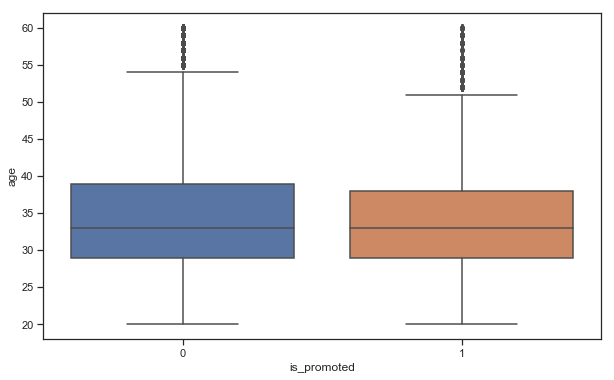

In [83]:
plt.figure(figsize=(10,6))
# sns.boxplot(x=raw_train_data['age'])
ax = sns.boxplot(x="is_promoted", y="age", data=raw_train_data)

In [84]:
from sklearn.utils import shuffle

In [85]:
# del raw_train_data['age_group']
# # # raw_train_data.columns
# # # del raw_train_data_new
# # del raw_test_data_new
# del raw_test_data['age_group']

In [86]:
bins = [19,35,40,50,60]
labels =['Millenial','Adult','Middle Age','Senior Citizens']

In [87]:
category = pd.cut(raw_train_data['age'], bins = bins, labels = labels)
raw_train_data.insert(17, 'age_group', category)

In [88]:
print("\nNumber of Columns in Training Data:")
print(len(raw_train_data.columns))
print("\nNumber of Columns in Test Data:")
print(len(raw_test_data.columns))


Number of Columns in Training Data:
19

Number of Columns in Test Data:
17


In [89]:
category = pd.cut(raw_test_data['age'], bins = bins, labels = labels)
raw_test_data.insert(16,'age_group', category)

In [90]:
raw_train_data['age_group'].value_counts()
raw_test_data['age_group'].value_counts()

Millenial          34183
Adult               9963
Middle Age          7810
Senior Citizens     2852
Name: age_group, dtype: int64

Millenial          14712
Adult               4209
Middle Age          3321
Senior Citizens     1248
Name: age_group, dtype: int64

In [91]:
raw_train_data_age = raw_train_data[['employee_id',
                           'age_group']].groupby('age_group').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
raw_train_data_age['Percentage'] = 100* raw_train_data_age['employee_id']/raw_train_data_age['employee_id'].sum()

raw_test_data_age = raw_test_data[['employee_id',
                           'age_group']].groupby('age_group').agg({'employee_id':'count'}).sort_values('employee_id',ascending = False)
raw_test_data_age['Percentage'] = 100* raw_test_data_age['employee_id']/raw_test_data_age['employee_id'].sum()

raw_train_data_age
raw_test_data_age

,employee_id,Percentage
age_group,,
Millenial,34183,62.368632
Adult,9963,18.178003
Middle Age,7810,14.249745
Senior Citizens,2852,5.203620


,employee_id,Percentage
age_group,,
Millenial,14712,62.630907
Adult,4209,17.918263
Middle Age,3321,14.137931
Senior Citizens,1248,5.312899


#### Length of Service

In [92]:
raw_train_data['length_of_service'].describe()

count    54808.000000
mean         5.865512
std          4.265094
min          1.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         37.000000
Name: length_of_service, dtype: float64

<Figure size 720x432 with 0 Axes>

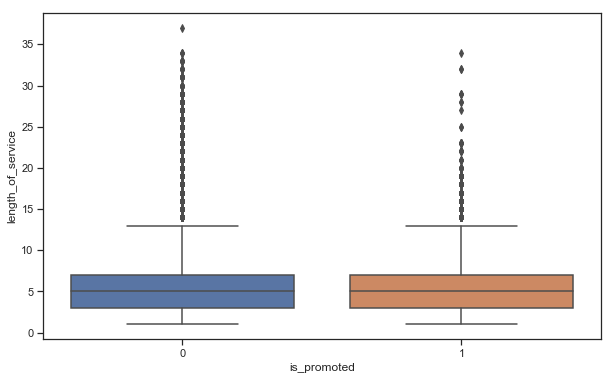

In [93]:
plt.figure(figsize=(10,6))
# sns.boxplot(x=raw_train_data['age'])
ax = sns.boxplot(x="is_promoted", y="length_of_service", data=raw_train_data)

In [94]:
bins = [0,5,10,40]
labels =['0-5','6-10','11-40']

In [95]:
# del raw_train_data['Tenure']
# del raw_test_data['Tenure']

In [96]:
category = pd.cut(raw_train_data['length_of_service'], bins = bins, labels = labels)
raw_train_data.insert(18, 'Tenure', category)

In [97]:
category = pd.cut(raw_test_data['length_of_service'], bins = bins, labels = labels)
raw_test_data.insert(17,'Tenure', category)

In [98]:
raw_train_data.Tenure.value_counts()
raw_test_data.Tenure.value_counts()

0-5      30932
6-10     17990
11-40     5886
Name: Tenure, dtype: int64

0-5      13398
6-10      7656
11-40     2436
Name: Tenure, dtype: int64

#### Average Training Score

In [99]:
raw_train_data['avg_training_score'].describe()
raw_test_data['avg_training_score'].describe()

count    54808.000000
mean        63.386750
std         13.371559
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

count    23490.000000
mean        63.263133
std         13.411750
min         39.000000
25%         51.000000
50%         60.000000
75%         76.000000
max         99.000000
Name: avg_training_score, dtype: float64

In [100]:
# del raw_train_data['Training_Score']
# del raw_test_data['Training_Score']

In [101]:
bins = [38,50,60,70,80,90,100]
labels =['30-50','51-60','61-70','71-80','81-90','91-100']

In [102]:
category = pd.cut(raw_train_data['avg_training_score'], bins = bins, labels = labels)
raw_train_data.insert(18, 'Training_Score', category)

In [103]:
category = pd.cut(raw_test_data['avg_training_score'], bins = bins, labels = labels)
raw_test_data.insert(17,'Training_Score', category)

In [104]:
raw_train_data.Training_Score.value_counts()
raw_test_data.Training_Score.value_counts()

51-60     16020
30-50     12003
61-70      9973
81-90      8739
71-80      7494
91-100      579
Name: Training_Score, dtype: int64

51-60     6762
30-50     5325
61-70     4236
81-90     3700
71-80     3230
91-100     237
Name: Training_Score, dtype: int64

In [105]:
raw_train_data.rename(columns= {"awards_won?": "awards_won"},inplace = True)
raw_test_data.rename(columns= {"awards_won?": "awards_won"},inplace = True)
raw_train_data.columns
raw_test_data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_gt_80', 'awards_won',
       'avg_training_score', 'is_promoted', 'new_dept', 'new_rgn',
       'new_Trainings', 'age_group', 'Training_Score', 'Tenure', 'Rating_cat'],
      dtype='object')

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_gt_80', 'awards_won',
       'avg_training_score', 'new_dept', 'new_rgn', 'new_Trainings',
       'age_group', 'Training_Score', 'Tenure', 'Rating_cat'],
      dtype='object')

## Random Forest Model

In [106]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import metrics, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [107]:
# del model_train_data
# del model_test_data

In [108]:
raw_test_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_gt_80,awards_won,avg_training_score,new_dept,new_rgn,new_Trainings,age_group,Training_Score,Tenure,Rating_cat
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.0,1,1,0,77,Technology,region_26,1 Training,Millenial,71-80,0-5,Rating 3
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51,HR,region_4,1 Training,Millenial,51-60,0-5,Rating 3
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47,Sales & Marketing,Others,1 Training,Millenial,30-50,0-5,Rating 1
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65,Procurement,Others,3 Trainings,Millenial,61-70,6-10,Rating 2
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61,Others,region_29,1 Training,Millenial,61-70,6-10,Rating 4


In [109]:
raw_train_data_emp_id = raw_train_data['employee_id']
raw_test_data_emp_id = raw_test_data['employee_id']

In [110]:
model_train_data = raw_train_data[['education','gender','recruitment_channel','new_Trainings','new_dept',
                                  'new_rgn','age_group','Rating_cat','Tenure','Training_Score','KPIs_met_gt_80'
                                  ,'awards_won','is_promoted']]

model_test_data = raw_test_data[['education','gender','recruitment_channel','new_Trainings','new_dept',
                                  'new_rgn','age_group','Rating_cat','Tenure','Training_Score','KPIs_met_gt_80'
                                  ,'awards_won']]

In [111]:
model_train_data.head(2)
model_test_data.head(2)

,education,gender,recruitment_channel,new_Trainings,new_dept,new_rgn,age_group,Rating_cat,Tenure,Training_Score,KPIs_met_gt_80,awards_won,is_promoted
0,Master's & above,f,sourcing,1 Training,Sales & Marketing,region_7,Millenial,Rating 5,6-10,30-50,1,0,0
1,Bachelor's,m,other,1 Training,Others,region_22,Millenial,Rating 5,0-5,51-60,0,0,0


,education,gender,recruitment_channel,new_Trainings,new_dept,new_rgn,age_group,Rating_cat,Tenure,Training_Score,KPIs_met_gt_80,awards_won
0,Bachelor's,m,sourcing,1 Training,Technology,region_26,Millenial,Rating 3,0-5,71-80,1,0
1,Bachelor's,f,other,1 Training,HR,region_4,Millenial,Rating 3,0-5,51-60,0,0


In [112]:
print(len(model_train_data.columns))
print(len(model_test_data.columns))

13
12


In [113]:
le = preprocessing.LabelEncoder()

In [114]:
model_train_data['education'] = le.fit_transform(model_train_data['education'])
model_train_data['gender'] = le.fit_transform(model_train_data['gender'])
model_train_data['new_Trainings'] = le.fit_transform(model_train_data['new_Trainings'])
model_train_data['new_dept'] = le.fit_transform(model_train_data['new_dept'])
model_train_data['new_rgn'] = le.fit_transform(model_train_data['new_rgn'])
model_train_data['recruitment_channel'] = le.fit_transform(model_train_data['recruitment_channel'])
model_train_data['age_group'] = le.fit_transform(model_train_data['age_group'])
model_train_data['Rating_cat'] = le.fit_transform(model_train_data['Rating_cat'])
model_train_data['Tenure'] = le.fit_transform(model_train_data['Tenure'])
model_train_data['Training_Score'] = le.fit_transform(model_train_data['Training_Score'])
model_train_data['KPIs_met_gt_80'] = le.fit_transform(model_train_data['KPIs_met_gt_80'])
model_train_data['awards_won'] = le.fit_transform(model_train_data['awards_won'])

# Out of time Validation Data
model_test_data['education'] = le.fit_transform(model_test_data['education'])
model_test_data['gender'] = le.fit_transform(model_test_data['gender'])
model_test_data['new_Trainings'] = le.fit_transform(model_test_data['new_Trainings'])
model_test_data['new_dept'] = le.fit_transform(model_test_data['new_dept'])
model_test_data['new_rgn'] = le.fit_transform(model_test_data['new_rgn'])
model_test_data['recruitment_channel'] = le.fit_transform(model_test_data['recruitment_channel'])
model_test_data['age_group'] = le.fit_transform(model_test_data['age_group'])
model_test_data['Rating_cat'] = le.fit_transform(model_test_data['Rating_cat'])
model_test_data['Tenure'] = le.fit_transform(model_test_data['Tenure'])
model_test_data['Training_Score'] = le.fit_transform(model_test_data['Training_Score'])
model_test_data['KPIs_met_gt_80'] = le.fit_transform(model_test_data['KPIs_met_gt_80'])
model_test_data['awards_won'] = le.fit_transform(model_test_data['awards_won'])

In [115]:
# encoder = preprocessing.LabelEncoder()
# encoder.fit(model_train_data)
# print("nLabel Mapping:")
# for i, item in enumerate(encoder.classes_):
#     print(item, '--&gt;', i)


# # %history
# label_encoders = {}
# categorical_columns = [0,1,2,3,4,5,6,7,8,9,10,11,12]
# for column in categorical_columns:
#     label_encoders[column] = LabelEncoder()
#     model_train_data[column] = label_encoders[column].fit_transform(model_train_data[:, column])

In [116]:
model_train_data.head(3)
model_test_data.head(3)

,education,gender,recruitment_channel,new_Trainings,new_dept,new_rgn,age_group,Rating_cat,Tenure,Training_Score,KPIs_met_gt_80,awards_won,is_promoted
0,2,0,2,0,5,16,2,4,2,0,1,0,0
1,0,1,0,0,3,3,2,4,0,1,0,0,0
2,0,1,2,0,5,0,2,2,2,0,0,0,0


,education,gender,recruitment_channel,new_Trainings,new_dept,new_rgn,age_group,Rating_cat,Tenure,Training_Score,KPIs_met_gt_80,awards_won
0,0,1,2,0,6,7,2,2,0,3,1,0
1,0,0,0,0,1,13,2,2,0,1,0,0
2,0,1,0,0,5,0,2,0,0,0,0,0


In [117]:
# Writing the data to the folder
model_train_data.to_csv('model_train_data.csv')
model_test_data.to_csv('model_test_data.csv')

In [118]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(model_train_data.drop(['is_promoted'],axis=1),
                                                 model_train_data['is_promoted'],train_size = 0.7,random_state=1)

In [119]:
y_train.value_counts()
y_test.value_counts()

0    35082
1     3283
Name: is_promoted, dtype: int64

0    15058
1     1385
Name: is_promoted, dtype: int64

In [122]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(38365, 12)
(16443, 12)
(38365,)
(16443,)


In [123]:
rf_1 = RandomForestClassifier(n_estimators=500, max_depth = 40, min_samples_split = 5,min_samples_leaf= 2, random_state=13)

In [123]:
rf_1.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=40, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [124]:
y_pred_rf_1 = rf_1.predict(x_test)

In [140]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_1))

In [141]:
def get_metrics(true_labels, predicted_labels):
    print('Accuracy:', np.round(metrics.accuracy_score(true_labels, predicted_labels),2))
    print('Precision:', np.round(metrics.precision_score(true_labels, predicted_labels,average='weighted'),2))
    print('Recall:', np.round(metrics.recall_score(true_labels, predicted_labels,average='weighted'),2))
    print('F1 Score:', np.round(metrics.f1_score(true_labels, predicted_labels,average='weighted'),2))

def train_predict_model(classifier,train_features,train_labels,test_features,test_labels):
    # build model    
    classifier.fit(train_features, train_labels)
    # predict using model
    predictions = classifier.predict(test_features) 
    return predictions

def confusion_matrix(true_labels, predicted_labels, classes=[1,0]):
    total_classes = len(classes)
    level_labels = [total_classes*[0], list(range(total_classes))]
    cm = metrics.confusion_matrix(y_true=true_labels, y_pred=predicted_labels, labels=classes)
    mat_frame = pd.DataFrame(data=cm, columns=pd.MultiIndex(levels=[['Predicted:'], classes], 
                                                           labels=level_labels), index=pd.MultiIndex(levels=[['Actual:'], classes], labels=level_labels)) 
    print(mat_frame)

def classification_report(true_labels, predicted_labels, classes=[1,0]):
    report = metrics.classification_report(y_true=true_labels,y_pred=predicted_labels, labels=classes) 
    print(report)

def model_performance_metrics(true_labels,predicted_labels,classes=[1,0]):
    print('Model Performance metrics:')
    print('*'*70)
    get_metrics(true_labels=true_labels, predicted_labels=predicted_labels)
    print('Model Classification report:')
    print('*'*70)
    classification_report(true_labels=true_labels, predicted_labels=predicted_labels, classes=classes)
    print('Prediction Confusion Matrix:')
    print('*'*70)
    confusion_matrix(true_labels=true_labels, predicted_labels=predicted_labels,classes=classes)

In [127]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred_rf_1, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.91
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.84      0.24      0.37      1385
           0       0.93      1.00      0.96     15058

   micro avg       0.93      0.93      0.93     16443
   macro avg       0.89      0.62      0.67     16443
weighted avg       0.93      0.93      0.91     16443

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        332   1053
        0         63  14995


In [164]:
y_pred_rf_1 = rf_1.predict(model_test_data)

In [165]:
model_test_data['y_pred_rf_1'] = y_pred_rf_1
model_test_data['employee_id'] = raw_test_data_emp_id

In [166]:
model_test_data.to_csv('Test_predicted.csv')

In [167]:
model_test_data.y_pred_xgb.value_counts()

0    22984
1      506
Name: y_pred_xgb, dtype: int64

In [530]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [536]:
model = XGBClassifier(silent=False, 
                      scale_pos_weight=30,
                      learning_rate=0.03,  
                      colsample_bytree=1,
                      subsample=0.8,
                      objective='binary:logistic', 
                      n_estimators=100, 
                      reg_alpha=0.3,
                      max_depth=20, 
                      gamma=5,
                      seed=27)

In [537]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)

In [533]:
model.fit(x_train,y_train)
# model.fit(x_us,y_us)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=5, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.03, max_delta_step=0, max_depth=20,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.3,
       reg_lambda=1, scale_pos_weight=30, seed=27, silent=False,
       subsample=0.8, tree_method=None, validate_parameters=False,
       verbosity=None)

In [534]:
y_pred_xgb = model.predict(x_test)

In [535]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred_xgb, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.8
Precision: 0.91
Recall: 0.8
F1 Score: 0.84
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.25      0.70      0.37      1385
           0       0.97      0.81      0.88     15058

   micro avg       0.80      0.80      0.80     16443
   macro avg       0.61      0.76      0.63     16443
weighted avg       0.91      0.80      0.84     16443

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        972    413
        0       2885  12173


In [615]:
model_1 = XGBClassifier(silent=False, 
                      scale_pos_weight=3,
                      learning_rate=0.001,  
                      colsample_bytree=1,
                      subsample=0.8,
                      objective='binary:logistic', 
                      n_estimators=500, 
                      reg_alpha=0.3,
                      max_depth=30, 
                      gamma=10,
                      seed=27)

In [616]:
model_1.fit(x_train,y_train)
# model.fit(x_us,y_us)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=10, gpu_id=-1,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.001, max_delta_step=0, max_depth=30,
       min_child_weight=1, missing=nan, monotone_constraints=None,
       n_estimators=500, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=27, reg_alpha=0.3,
       reg_lambda=1, scale_pos_weight=3, seed=27, silent=False,
       subsample=0.8, tree_method=None, validate_parameters=False,
       verbosity=None)

In [617]:
y_pred_xgb_1 = model_1.predict(x_test)

In [618]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred_xgb_1, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.93
Precision: 0.92
Recall: 0.93
F1 Score: 0.92
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.63      0.36      0.46      1385
           0       0.94      0.98      0.96     15058

   micro avg       0.93      0.93      0.93     16443
   macro avg       0.79      0.67      0.71     16443
weighted avg       0.92      0.93      0.92     16443

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        499    886
        0        292  14766


In [619]:
y_pred_xgb_val = model_1.predict(model_test_data)

In [621]:
model_test_data['y_pred_xgb'] = y_pred_xgb_val

In [623]:
model_test_data.y_pred_xgb.value_counts()

0    22370
1     1120
Name: y_pred_xgb, dtype: int64

In [624]:
model_test_data.to_csv('xgb_model_pred.csv')

### Random Forest with Grid Search

In [7]:
from pprint import pprint #pretty print

In [142]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [143]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_gs = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_gs, param_distributions = random_grid, n_iter = 10,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  5.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

The most important arguments in RandomizedSearchCV are n_iter, 
which controls the number of different combinations to try, 
and cv which is the number of folds to use for cross validation (we use 100 and 3 respectively). 
More iterations will cover a wider search space and more cv folds reduces the chances of overfitting,
but raising each will increase the run time. Machine learning is a field of trade-offs,
and performance vs time is one of the most fundamental.

In [144]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [145]:
rf_gs_best = RandomForestClassifier(n_estimators=200, max_depth = 50, min_samples_split = 10,min_samples_leaf= 2,
                                    max_features = 'sqrt', bootstrap = True, random_state=13)

In [146]:
rf_gs_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [147]:
rf_gs_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=13, verbose=0, warm_start=False)

In [148]:
y_pred_rf_gs_best = rf_gs_best.predict(x_test)

In [150]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred_rf_gs_best, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.93
Precision: 0.93
Recall: 0.93
F1 Score: 0.92
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.90      0.24      0.37      1385
           0       0.93      1.00      0.96     15058

   micro avg       0.93      0.93      0.93     16443
   macro avg       0.92      0.62      0.67     16443
weighted avg       0.93      0.93      0.92     16443

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        327   1058
        0         36  15022


In [155]:
model_test_data.head()

,education,gender,recruitment_channel,new_Trainings,new_dept,new_rgn,age_group,Rating_cat,Tenure,Training_Score,KPIs_met_gt_80,awards_won
0,0,1,2,0,6,7,2,2,0,3,1,0
1,0,0,0,0,1,13,2,2,0,1,0,0
2,0,1,0,0,5,0,2,0,0,0,0,0
3,0,0,0,2,4,0,2,1,2,2,0,0
4,0,1,2,0,3,9,2,3,2,2,0,0


In [157]:
y_pred_rf_gs_best = rf_gs_best.predict(model_test_data)

In [158]:
model_test_data['is_promoted'] = y_pred_rf_gs_best
model_test_data['employee_id'] = raw_test_data_emp_id
model_test_data.head()

,education,gender,recruitment_channel,new_Trainings,new_dept,new_rgn,age_group,Rating_cat,Tenure,Training_Score,KPIs_met_gt_80,awards_won,is_promoted,employee_id
0,0,1,2,0,6,7,2,2,0,3,1,0,0,8724
1,0,0,0,0,1,13,2,2,0,1,0,0,0,74430
2,0,1,0,0,5,0,2,0,0,0,0,0,0,72255
3,0,0,0,2,4,0,2,1,2,2,0,0,0,38562
4,0,1,2,0,3,9,2,3,2,2,0,0,0,64486


In [160]:
model_test_data.is_promoted.value_counts()

0    23020
1      470
Name: is_promoted, dtype: int64

In [161]:
model_test_data.to_csv('Test_predicted_rf_gs_best.csv')

### Oversampling Method

In [134]:
# import imblearn
# # import imblearn
# from imblearn.under_sampling import RandomUnderSampler

In [136]:
# # x_train,x_test,y_train,y_test
# rus = RandomUnderSampler(return_indices=True)
# x_us, y_us, id_us = rus.fit_sample(x_train, y_train)

In [215]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2,sampling_strategy= 0.27)

In [216]:
x_train_os, y_train_os = sm.fit_sample(x_train, y_train)

In [217]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train ==0)))

Before OverSampling, counts of label '1': 3283
Before OverSampling, counts of label '0': 35082 



In [218]:
print('After OverSampling, the shape of train_X: {}'.format(x_train_os.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_os.shape))

After OverSampling, the shape of train_X: (44554, 12)
After OverSampling, the shape of train_y: (44554,) 



In [219]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_os==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_os==0)))

After OverSampling, counts of label '1': 9472
After OverSampling, counts of label '0': 35082


In [220]:
rf_smote1 = RandomForestClassifier(n_estimators=1000, max_depth=40, min_samples_split = 30,min_samples_leaf=5, random_state=17)
# rf_1 = RandomForestClassifier(n_estimators=500, max_depth = 40, min_samples_split = 5,min_samples_leaf= 2, random_state=13)

In [221]:
rf_smote1.fit(x_train_os, y_train_os)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=30,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [222]:
y_smote_1 = rf_smote1.predict(x_test)

In [223]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_smote_1, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.92
Precision: 0.9
Recall: 0.92
F1 Score: 0.91
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.51      0.32      0.39      1385
           0       0.94      0.97      0.96     15058

    accuracy                           0.92     16443
   macro avg       0.72      0.64      0.67     16443
weighted avg       0.90      0.92      0.91     16443

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        439    946
        0        423  14635


In [290]:
under = RandomUnderSampler(sampling_strategy=0.33)
under

RandomUnderSampler(random_state=None, replacement=False, sampling_strategy=0.33)

In [291]:
X_resampled, y_resampled = under.fit_resample(x_train, y_train)

In [292]:
# from imblearn.combine import SMOTEENN
# from imblearn.combine import SMOTETomek

In [293]:
# smote_enn = SMOTEENN(random_state=0)
# smote_tomek = SMOTETomek(random_state=0)

In [294]:
# X_resampled, y_resampled = smote_enn.fit_resample(x_train, y_train)

In [295]:
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, counts of label '1': 3283
After OverSampling, counts of label '0': 9948


In [303]:
rf_smote1 = RandomForestClassifier(n_estimators=1000, max_depth=50, min_samples_split = 40,
                                   min_samples_leaf=10, random_state=17)

In [304]:
rf_smote1.fit(X_resampled, y_resampled)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=17, verbose=0,
                       warm_start=False)

In [305]:
y_smote_1 = rf_smote1.predict(x_test)

In [306]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_smote_1, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.91
Precision: 0.9
Recall: 0.91
F1 Score: 0.91
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.47      0.38      0.42      1385
           0       0.94      0.96      0.95     15058

    accuracy                           0.91     16443
   macro avg       0.71      0.67      0.69     16443
weighted avg       0.90      0.91      0.91     16443

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        533    852
        0        608  14450


In [308]:
from numpy import loadtxt
from xgboost import XGBClassifier

In [425]:
under = RandomUnderSampler(sampling_strategy=0.11)
under

RandomUnderSampler(random_state=None, replacement=False, sampling_strategy=0.11)

In [426]:
X_resampled, y_resampled = under.fit_resample(x_train, y_train)

In [427]:
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled==0)))

After OverSampling, counts of label '1': 3283
After OverSampling, counts of label '0': 29845


In [428]:
xgb_us = XGBClassifier(silent=False, 
#                       scale_pos_weight=3,
                      learning_rate=0.3,  
                      colsample_bytree=1,
                      subsample=0.8,
                      objective='binary:logistic', 
                      n_estimators=500, 
                      reg_alpha=0.3,
                      max_depth=3, 
                      gamma=1,
                      seed=27)

In [429]:
xgb_us.fit(X_resampled, y_resampled)
# model.fit(x_us,y_us)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=27, reg_alpha=0.3,
              reg_lambda=1, scale_pos_weight=1, seed=27, silent=False,
              subsample=0.8, tree_method=None, validate_parameters=False,
              verbosity=None)

In [430]:
y_pred_xgb_us = xgb_us.predict(x_test)

In [431]:
model_performance_metrics(true_labels=y_test, predicted_labels=y_pred_xgb_us, classes=[1, 0])

Model Performance metrics:
**********************************************************************
Accuracy: 0.94
Precision: 0.93
Recall: 0.94
F1 Score: 0.92
Model Classification report:
**********************************************************************
              precision    recall  f1-score   support

           1       0.84      0.31      0.45      1385
           0       0.94      0.99      0.97     15058

    accuracy                           0.94     16443
   macro avg       0.89      0.65      0.71     16443
weighted avg       0.93      0.94      0.92     16443

Prediction Confusion Matrix:
**********************************************************************
          Predicted:       
                   1      0
Actual: 1        428    957
        0         83  14975


In [414]:
y_pred_xgb_us_test = xgb_us.predict(model_test_data)

In [419]:
model_test_data['is_promoted'] = y_pred_xgb_us_test
model_test_data['employee_id'] = raw_test_data_emp_id
model_test_data.head()

,education,gender,recruitment_channel,new_Trainings,new_dept,new_rgn,age_group,Rating_cat,Tenure,Training_Score,KPIs_met_gt_80,awards_won,y_pred_xgb,is_promoted,employee_id
0,0,1,2,0,6,7,2,2,0,3,1,0,0,0,8724
1,0,0,0,0,1,13,2,2,0,1,0,0,0,0,74430
2,0,1,0,0,5,0,2,0,0,0,0,0,0,0,72255
3,0,0,0,2,4,0,2,1,2,2,0,0,0,0,38562
4,0,1,2,0,3,9,2,3,2,2,0,0,0,0,64486


In [421]:
model_test_data.is_promoted.value_counts()

0    22725
1      765
Name: is_promoted, dtype: int64

In [423]:
model_test_data.to_csv('xgb_sm.csv')

In [424]:
os.getcwd()

'C:\\Users\\anchhabra\\HR_Practice_case'

In [ ]:
# https://github.com/sharmaroshan/HR-Analytics/blob/master/HRAnalytics.ipynb